# Gráfica de Pie

Gráfico circular - de tarta - pie chart - dona - donut chart

Representa las partes porcentuales de un todo a través de segmentos en un círculo.


## ¿Cuándo utilizar ?

Quiero comparar las partes porcentuales de un todo

La suma de los porcentajes será el 100%

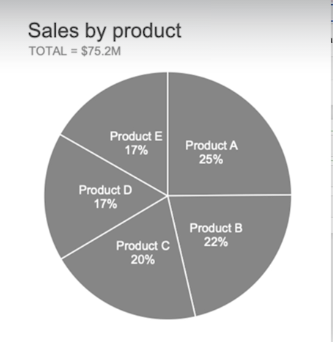

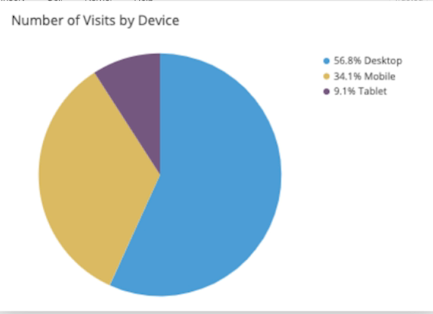

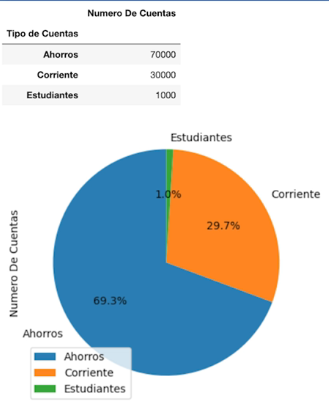

## ¿Cuándo no utilizar?

Si quiero comparar magnitudes absolutas

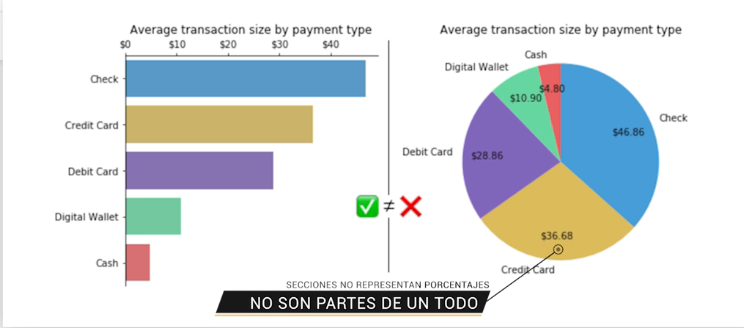

Tengo demasiadas categorías, o todas son similares entre sí

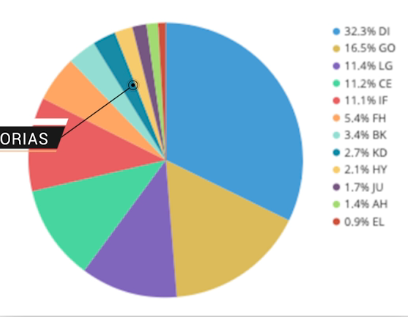

Una categoría representa el >95% de mis datos

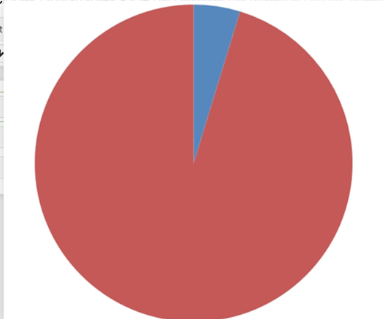

El porcentaje de las categorías son muy similares entre sí

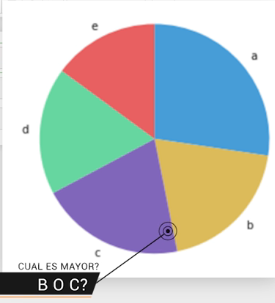

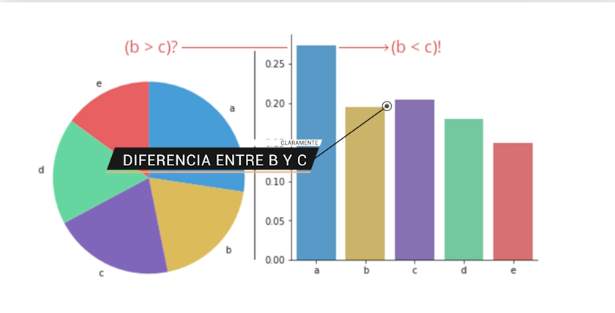

## Consejos

Lo podemos utilizar en conjunto con un diagrama de barras para mostrar la misma informacion desde un punto de vista diferente.

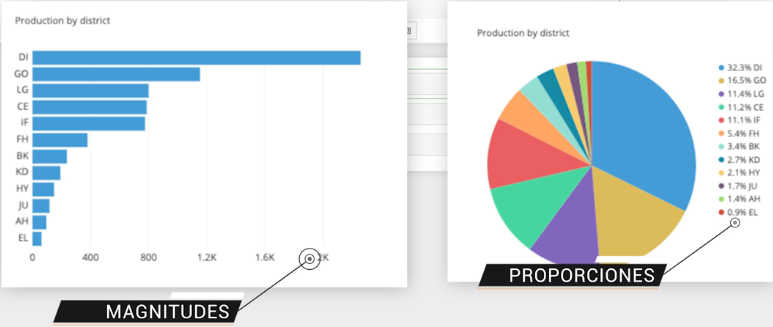

No representar dos pie charts diferentes con el objetivo de compararlos entre ellos. Complicado de leer. 

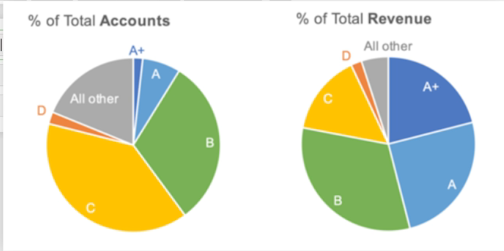

Es recomendable utilizar diferentes colores para diferenciar categorias o para resaltar uno de los segmentos.

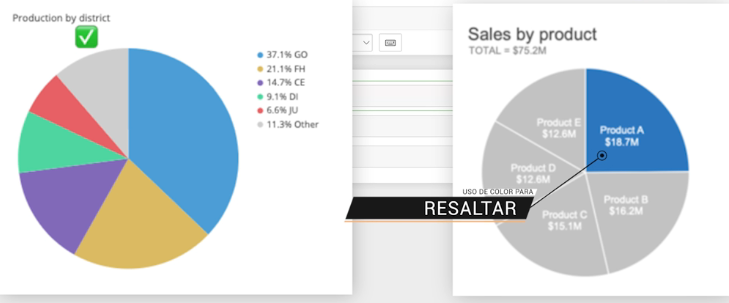

Evitar usar Pie charts en 3D

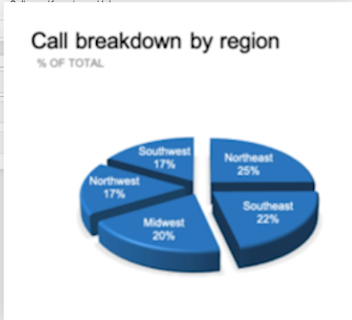

Ordenar los segmentos en sentido ascedente o descendente en sentido horario u antihorario

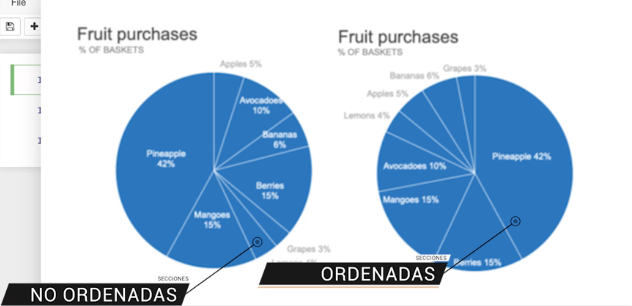

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
pasajeros = df.groupby('Sex').agg({
    'PassengerId' : 'count'
})
pasajeros

,PassengerId
Sex,
female,314
male,577


### Objetivo:

Visualizar la proporcion de pasajeros hombres y mujeres en el Titanic

<AxesSubplot:ylabel='PassengerId'>

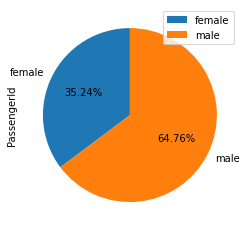

In [4]:
pasajeros.plot.pie(
    y = 'PassengerId',
    startangle = 90,
    autopct = '%1.2f%%'
)

In [5]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import plotly.express as px

In [7]:
pasajeros2 = pasajeros.reset_index()
pasajeros2

,Sex,PassengerId
0,female,314
1,male,577


In [11]:
fig = px.pie(
    pasajeros2,
    names = 'Sex',
    values = 'PassengerId',
    title = 'Proporción de pasajeros del Titanic por sexo'
)

fig.show()

In [14]:
fig = px.pie(
    pasajeros2,
    names = 'Sex',
    values = 'PassengerId',
    title = 'Proporción de pasajeros del Titanic por sexo',
    hole = 0.4 #estetica
)

fig.show()

### Objetivo:
Visualizar la proporcion de pasajeros de cada clase en el Titanic

In [21]:
pasajeros_clase = df.groupby('Pclass').agg({
    'PassengerId' : 'count'
})

In [23]:
pasajeros_clase2 = pasajeros_clase.reset_index()
pasajeros_clase2

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


In [24]:
fig = px.pie(
    pasajeros_clase2,
    names = 'Pclass',
    values = 'PassengerId',
    title = 'Proporción de pasajeros del Titanic por clase'
)

fig.show()